In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title="", image = None , size=10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show

In [2]:
image = cv2.imread('/content/sample.png')
imshow("image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow("gray", gray) #conveting image to grayscale image.

edged = cv2.Canny(gray, 30, 200)
imshow("edged", edged)

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("number of contours found =", len(contours))

cv2.drawContours(image, contours, -1, (0, 0, 0), 3)
imshow("contours", image)


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
def contour_area(contour):
  all_areas = []
  for cnt in contour:
    area = cv2.contourArea(cnt)
    all_areas.append(area)
  return all_areas

print("countour areas before sorting...")
areas = contour_area(contours)
print("contour areas =", areas)

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
print("countour areas after sorting...")
areas = contour_area(sorted_contours)
print("contour areas =", areas)


#iterate over the countours and draw one at a time
#This code processes contours detected in an image,
# computes their centroids, labels them, and draws them on the image.
for (i,c) in enumerate(sorted_contours):
  M = cv2.moments(c)
  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])
  cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 78, 0), 2)
  cv2.drawContours(image, [c], -1, (0, 0, 0), 3)
imshow("contours", image)

In [ ]:
def x_cord_contour(contours):
  if cv2.contourArea(contours)>10:
    M = cv2.moments(contours)
    return (int(M['m10']/M['m00']))
  else:
    pass

def label_contour_center(image, c):
  M = cv2.moments(c)
  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])

  cv2.circle(image, (cx, cy), 10, (0, 0, 0), -1)
  return image

In [ ]:
def x_cord_contour(contours):
  if cv2.contourArea(contours)>10:
    M = cv2.moments(contours)
    return (int(M['m10']/M['m00']))
  else:
    return 0 # Return 0 for small contours instead of None

def label_contour_center(image, c):
  M = cv2.moments(c)
  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])

  cv2.circle(image, (cx, cy), 10, (0, 0, 0), -1)
  return image

original_image = image.copy()

for (i, c) in enumerate(contours):
  orig = label_contour_center(image, c)

imshow("sorting left to right", image)

contours_left_to_right = sorted(contours, key=x_cord_contour, reverse=False) # Now sorts correctly

for (i, c) in enumerate(contours_left_to_right):
  cv2.drawContours(original_image, [c], -1, (0,0,0), 3)
  M = cv2.moments(c)
  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])
  cv2.putText(original_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
  (x, y, w, h) = cv2.boundingRect(c)

imshow("sorting left to right", original_image)

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/image2.jpg')
orig_image = image.copy()

imshow("orinial image", orig_image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow("gray", gray)

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

#find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

#iterate over each contour
for c in contours:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(orig_image, (x,y), (x+w, y+h), (0,0,255), 2)
  cv2.drawContours(image, [c], -1, (0,0,255), 2)

imshow("contours", image)
imshow("bounding rectangles", orig_image)

# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow('Approx Poly DP', copy)

In [ ]:
image  = cv2.imread('/content/download.jpg')
orig_image = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow("gray", gray)

#threshold in the image
ret, thresh = cv2.threshold(gray, 127, 255, 0)

contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, -1, (255,0,0), 2)
imshow("contours", image)

# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(orig_image, [hull], 0, (0, 255, 0), 2)

imshow('Convex Hull', orig_image)

In [ ]:
#i am not doing matching contours you can do it if you want to

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title="", image = None , size=10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show


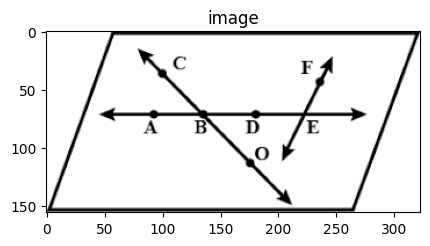

In [2]:
image = cv2.imread('/content/images.png')
imshow("image", image)

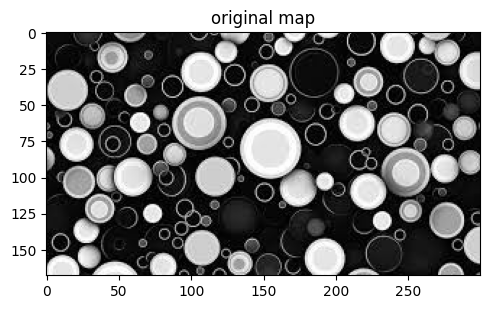

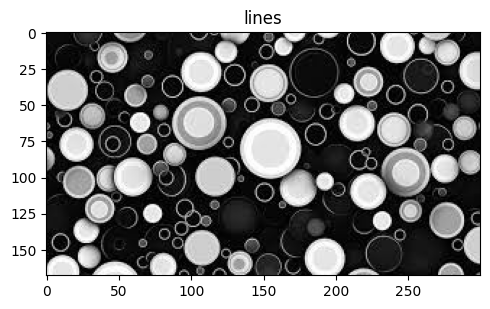

In [9]:
imshow("original map", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 240)

if lines is not None:
 for line in lines:
   rho, theta = line[0]
   a = np.cos(theta)
   b = np.sin(theta)
   x0 = a*rho
   y0 = b*rho
   x1 = int(x0 + 1000*(-b))
   y1 = int(y0 + 1000*(a))
   x2 = int(x0 - 1000*(-b))
   y2 = int(y0 - 1000*(a))
   cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow("lines", image)

(13, 1, 4)


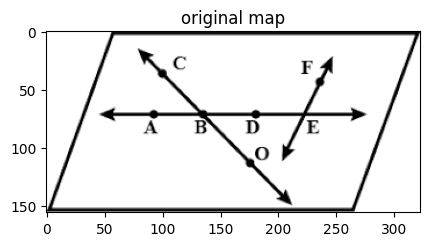

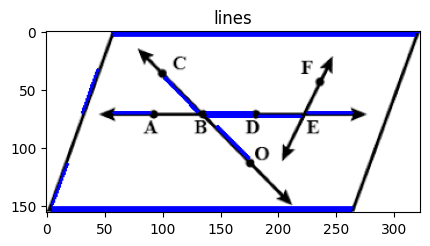

In [3]:
imshow("original map", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, 3, 25)
print(lines.shape)

for x in range(0,len(lines)):
  for x1,y1,x2,y2 in lines[x]:
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow("lines", image)

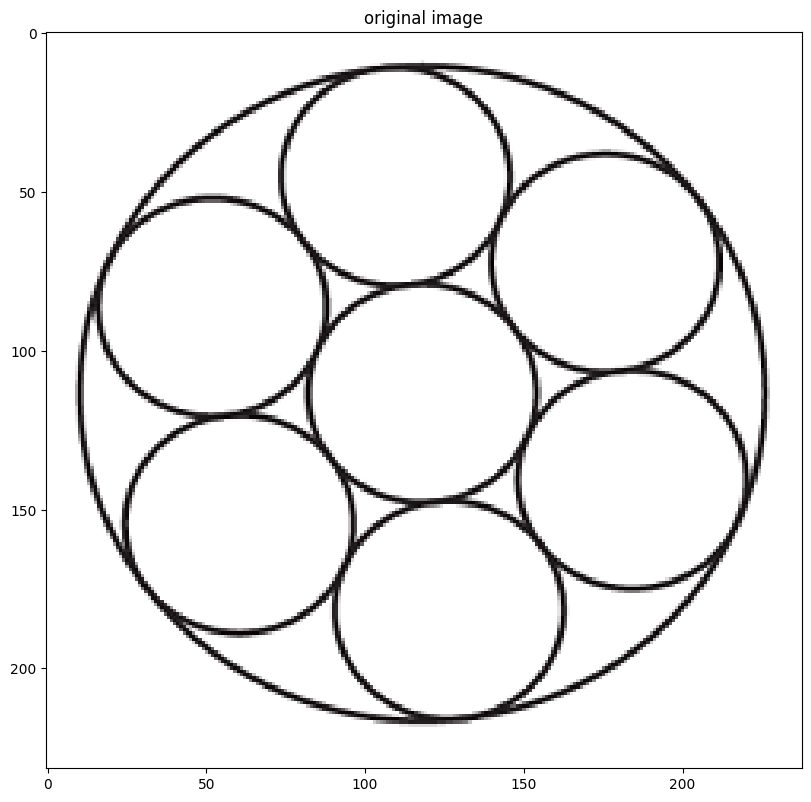

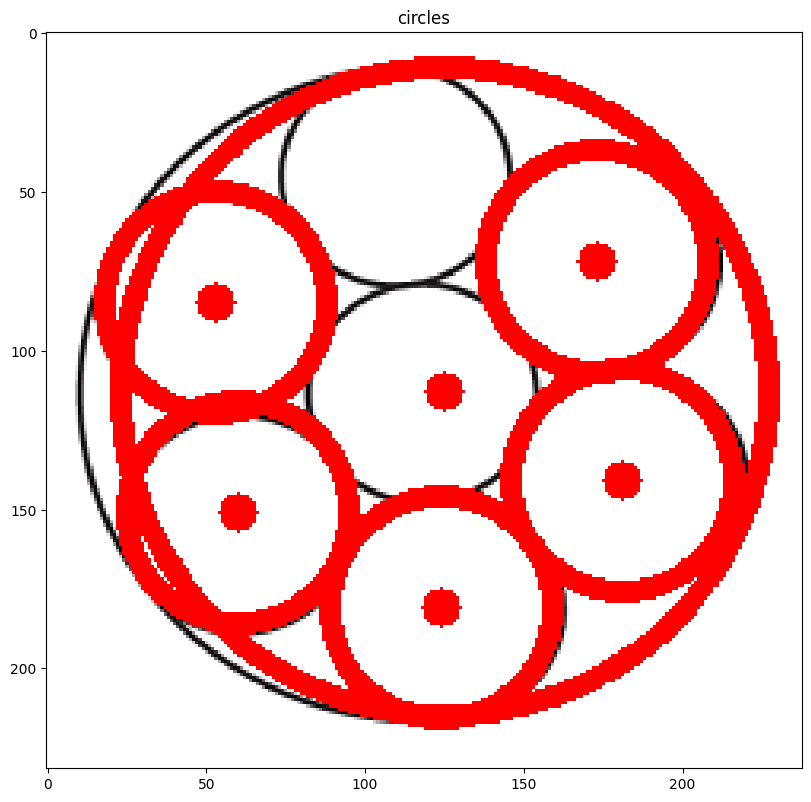

In [16]:
image = cv2.imread('/content/xFPMO.png')

imshow("original image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5),0)
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1.2,100)

if circles is not None:
 for i in circles[0,:]:
   center = (int(i[0]), int(i[1]))
   radius = int(i[2])
   cv2.circle(image, center, radius, (0,0,255),5)
   cv2.circle(image, center, 2, (0,0,255),8)

imshow("circles", image)

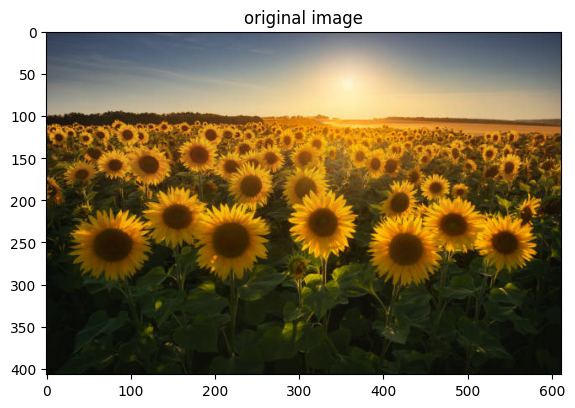

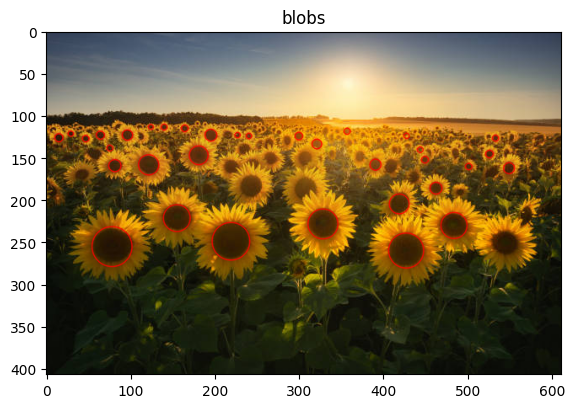

In [17]:
image = cv2.imread('/content/istockphoto-1298291139-612x612.jpg')
imshow("original image", image)

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imshow("blobs", blobs)